In [1]:
import pandas as pd   #import the pandas library
from operator import itemgetter
import matplotlib.pyplot as plt
parquet_file = '/content/part-00000-9b516a4d-11f6-4612-b327-ff1a9c8a4620-c000.snappy.parquet' 
sample = pd.read_parquet(parquet_file, engine='pyarrow')

In [2]:
print("Number of Trials: ", len(sample))

Number of Trials:  560


<AxesSubplot:title={'center':'Results Submitted Histogram'}, xlabel='results_first_submitted_qc'>

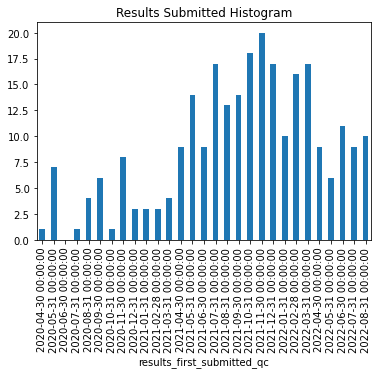

In [3]:
plt.title('Results Submitted Histogram')
sample["results_first_submitted_qc"] = sample["results_first_submitted_qc"].astype("datetime64")
sample.set_index('results_first_submitted_qc', inplace=True)
sample.resample('M').size().plot.bar()

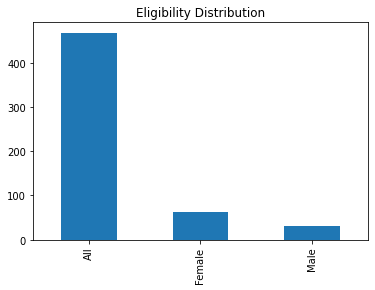

In [4]:
plt.title('Eligibility Distribution')
sample['eligibility_gender'].value_counts().plot(kind='bar');

In [5]:
conditions= {}
for i in sample.condition.tolist():
  for j in i:
    
    if (j in conditions):
      conditions[j] = conditions[j]+1
    else:
      conditions[j] = 1
print(conditions)
con_10 = dict(sorted(conditions.items(), key = itemgetter(1), reverse = True)[:30])

{'Tooth Bleaching': 1, 'Healthy Volunteers': 12, 'Male': 2, 'Japanese': 1, 'Hyposalivation': 1, 'Diet, Healthy': 6, 'Diet Habit': 1, 'Disease, Chronic': 1, 'Health Behavior': 3, 'Rural Health': 1, 'Pregnancy Related': 3, 'Alveolar Process Atrophy': 1, 'Myocardial Infarction': 1, 'High-Density Lipoid Deficiency': 1, 'Meniscus Tear, Tibial': 1, 'Pain, Postoperative': 3, 'Postoperative Complications': 1, 'Ketorolac Adverse Reaction': 1, 'Opioid Use': 3, 'ACL Injury': 1, 'Postoperative Pain': 2, 'Atrial Fibrillation': 2, 'Communication Disorders': 1, 'HIV Infections': 3, 'Pre-Exposure Prophylaxis': 1, 'Dentin Hypersensitivity': 1, 'Community Reinforcement And Family Training': 1, 'Family Health': 1, 'Substance-Related Disorders': 1, 'Compliance, Patient': 1, 'Healthy': 21, 'Long-Term Memory Decline': 1, 'Mild Cognitive Impairment': 2, 'Torus Palatinus and Torus Mandibularis': 1, 'Food Deprivation': 1, 'Injuries': 1, 'Sports Injury': 1, 'Sports Injuries in Children': 1, 'Benign Prostatic Hy

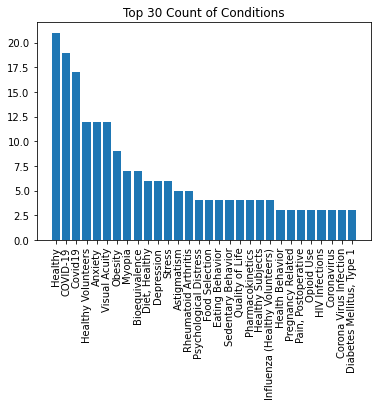

In [6]:
plt.title("Top 30 Count of Conditions")
plt.bar(range(len(con_10)), list(con_10.values()), align='center')
plt.xticks(range(len(con_10)), list(con_10.keys()))
plt.xticks(rotation=90)
plt.show()

In [10]:
sample.brief_summary_textblock

results_first_submitted_qc
2020-05-02    \n      The objective of the present study was...
2021-01-11    \n      A Randomised, Double Blind, Two-Arm, S...
2021-02-03    \n      Randomized, double blind, parallel gro...
2022-06-16    \n      Individuals with dry mouth (a reductio...
2022-04-28    \n      There is a need to develop evidence-ba...
                                    ...                        
NaT           \n      The purpose of this study is to assess...
NaT           \n      Purpose: investigators explored the ef...
NaT           \n      The most important step in the treatme...
NaT           \n      Some undesirable complications such as...
NaT           \n      The aim was to observe the effect of t...
Name: brief_summary_textblock, Length: 560, dtype: object

In [13]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=50, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(sample.brief_summary_textblock)

In [14]:
model = NMF(n_components=10, random_state=5)

model.fit(X)
nmf_features = model.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [28]:
len(nmf_features)

560

In [16]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,19,aim,assess,based,care,clinical,compare,compared,control,controlled,...,safety,single,study,test,time,treatment,trial,use,used,using
0,0.000000,0.076358,0.000000,0.000000,0.000000,0.000000,0.095954,0.073306,1.160502,0.236367,...,0.000000,0.000000,0.274735,0.000000,0.000000,0.00000,0.076641,0.000000,0.195576,0.045519
1,0.000000,0.000000,0.222807,0.002705,0.000000,0.000000,0.014295,0.016257,0.000000,0.058855,...,0.817986,0.824102,0.095330,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,1.414529,0.194362,0.125684,0.000000,0.012137,0.000000,0.002677,0.000000,0.144632,0.024936,...,0.026597,0.000000,0.025713,0.000000,0.048257,0.00000,0.000000,0.019370,0.048553,0.000000
3,0.000000,0.117200,0.040832,0.045505,0.252108,0.045212,0.000000,0.136487,0.001991,0.056404,...,0.000000,0.000000,0.183955,0.000000,0.079717,0.00000,0.000000,0.086643,0.087064,0.278846
4,0.000000,0.000000,0.108448,0.000000,0.000000,0.000000,0.141377,0.023841,0.000000,0.000000,...,0.000000,0.133891,0.077256,0.000000,0.128253,2.03865,0.000000,0.183391,0.000000,0.000000
5,0.000000,0.068318,0.000000,0.000000,0.000000,0.000000,0.052681,0.006771,0.083208,0.021383,...,0.000000,0.000000,0.000000,0.000000,0.047800,0.00000,0.000000,0.356232,0.305322,0.108166
6,0.000000,0.000000,0.004570,0.014393,0.000000,1.067874,0.095550,0.020634,0.023309,0.445655,...,0.000000,0.091724,0.000000,0.000000,0.069193,0.00000,1.196196,0.007705,0.120219,0.101672
7,0.000000,0.084868,0.094864,0.906766,0.664113,0.000000,0.000000,0.200035,0.067263,0.000000,...,0.000000,0.000000,0.199883,0.000000,0.261813,0.00000,0.000000,0.531854,0.037973,0.105130
8,0.000000,0.098444,0.163036,0.000000,0.000000,0.000000,0.000000,0.041194,0.171238,0.000000,...,0.000000,0.050921,0.000000,1.818458,0.035923,0.00000,0.000000,0.035250,0.158241,0.131988
9,0.000000,0.217827,0.077600,0.103472,0.000000,0.131070,0.233036,0.073042,0.014550,0.000000,...,0.134817,0.000000,2.198100,0.000000,0.000000,0.00000,0.000000,0.007078,0.031870,0.249948


In [17]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
group           2.655753
control         1.160502
groups          0.613002
participants    0.524922
intervention    0.426807
randomized      0.339230
study           0.274735
controlled      0.236367
used            0.195576
effect          0.189102
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
dose            0.959688
participants    0.877470
healthy         0.876533
single          0.824102
safety          0.817986
assess          0.222807
period          0.138406
primary         0.128641
non             0.112747
study           0.095330
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
covid       1.593903
19          1.414529
aim         0.194362
control     0.144632
research    0.137135
disease     0.129257
assess      0.125684
efficacy    0.107595
risk        0.079235
health      0.076412
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
patients    

In [29]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
train_X_tsne = tsne.fit_transform(nmf_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



2022-09-26 20:49:56,352 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


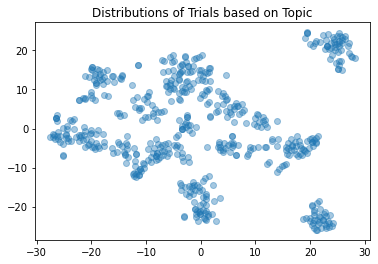

In [31]:
plt.title("Distributions of Trials based on Topic")
plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1],  cmap='prism', alpha=0.4)